In [2]:
#import necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

### Business Understanding
As a soccer lover, I'm fascinated to explore on FIFA 18 complete player dataset. I took the dataset from Kaggle (https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset)

The dataset contains player personal attributes (such as Nationality, club, photo, age, value, etc.); Player performance attributes (Overall, Potential, Aggression, Agility) and Player preferred position and ratings at all positions

##### Project Motivation

The motivation behind the project is to study and understand the soccer players collected in FIFA 18 and analyze which Club or National Team has the best-rated players, co-relate between age and overall rating, nationality, potential, etc. and the results could add value to fantasy premier league enthusiasts. I would like to attempt the following questions to be addressed

1. Which Country has the maximum number of Soccer Players collected in FIFA 18 and List the top 20 countries?

2. What is the age distribution of the FIFA 18 Players?

3. Identify the top 10 clubs with the highest total player market value, and the highest average player wage?

4. Identify the best Squad?

5. Do Correlation between Age, Overall, Potential, Position, Club, Nationality, Special vs Value/Wage

### Data Understanding
I will use FIFA 18 Complete Player Dataset from kaggle. For this project, I will use the CompleteDataset.csv which contains all the information of the Players in FIFA 18.

In [3]:
# Read in the Complete Dataset
CompleteDataset = pd.read_csv('./CompleteDataset.csv')
CompleteDataset.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Get the Basic info of the dataset
CompleteDataset.describe()

,Unnamed: 0,Age,Overall,Potential,Special,CAM,CB,CDM,CF,CM,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
count,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,...,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000
mean,8990.000000,25.144541,66.247984,71.190813,1594.095100,59.251755,55.550464,56.865283,59.030028,58.506833,...,56.979689,55.550464,58.506833,56.865283,59.030028,60.057736,58.204050,59.359265,57.698721,58.204050
std,5190.811931,4.614272,6.987965,6.102199,272.151435,9.880164,12.192579,10.310178,9.926988,8.888040,...,9.791627,12.192579,8.888040,10.310178,9.926988,9.349180,9.181392,9.978084,9.142825,9.181392
min,0.000000,16.000000,46.000000,46.000000,728.000000,27.000000,25.000000,26.000000,27.000000,30.000000,...,30.000000,25.000000,30.000000,26.000000,27.000000,28.000000,31.000000,26.000000,31.000000,31.000000
25%,4495.000000,21.000000,62.000000,67.000000,1449.000000,53.000000,45.000000,49.000000,53.000000,53.000000,...,50.000000,45.000000,53.000000,49.000000,53.000000,54.000000,52.000000,53.000000,51.000000,52.000000
50%,8990.000000,25.000000,66.000000,71.000000,1633.000000,60.000000,57.000000,58.000000,60.000000,59.000000,...,58.000000,57.000000,59.000000,58.000000,60.000000,61.000000,59.000000,60.000000,58.000000,59.000000
75%,13485.000000,28.000000,71.000000,75.000000,1786.000000,66.000000,65.000000,65.000000,66.000000,65.000000,...,64.000000,65.000000,65.000000,65.000000,66.000000,67.000000,65.000000,66.000000,64.000000,65.000000
max,17980.000000,47.000000,94.000000,94.000000,2291.000000,92.000000,87.000000,85.000000,92.000000,87.000000,...,84.000000,87.000000,87.000000,85.000000,92.000000,90.000000,92.000000,91.000000,84.000000,92.000000


In [4]:
CompleteDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 75 columns):
Unnamed: 0             17981 non-null int64
Name                   17981 non-null object
Age                    17981 non-null int64
Photo                  17981 non-null object
Nationality            17981 non-null object
Flag                   17981 non-null object
Overall                17981 non-null int64
Potential              17981 non-null int64
Club                   17733 non-null object
Club Logo              17981 non-null object
Value                  17981 non-null object
Wage                   17981 non-null object
Special                17981 non-null int64
Acceleration           17981 non-null object
Aggression             17981 non-null object
Agility                17981 non-null object
Balance                17981 non-null object
Ball control           17981 non-null object
Composure              17981 non-null object
Crossing               17981 non-null obj

In [39]:
num_rows = CompleteDataset.shape[0] #Provide the number of rows    in the dataset
num_cols = CompleteDataset.shape[1] #Provide the number of columns in the dataset
print("Row    number: {}".format(num_rows))
print("Column number: {}".format(num_cols))

Row    number: 17981
Column number: 75


In [6]:
# To check the column names in the dataset
CompleteDataset.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

### Data Cleaning and Preparation
There are a few steps need to be adopted before using the dataset for exploration. The steps include are the following:
1. Leaving or dropping unused columns
2. Checking columns with missing values
2. Transforming string values into numbers for Value & Wage
3. One-Hot encoding for Categorical variables such as Club, Nationality, Preferred Positions etc.,

In [7]:
# Data Preparation Step 1: Drop the columns which will not be used in this project
CompleteDataset.drop('Photo',     axis = 1,inplace=True)
CompleteDataset.drop('Flag',      axis = 1,inplace=True)
CompleteDataset.drop('Club Logo', axis = 1,inplace=True)
CompleteDataset.drop('ID',        axis = 1,inplace=True)
CompleteDataset.head()

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,2228,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,2154,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,2100,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,2291,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,1493,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Data Preparation Step 2: Check whether any column has missing values
columns_with_missing_values = set(CompleteDataset.columns[CompleteDataset.isnull().mean()!=0])
print(columns_with_missing_values)

{'CF', 'RWB', 'CB', 'LB', 'RW', 'Club', 'RM', 'RS', 'LM', 'LAM', 'RCB', 'RCM', 'CDM', 'ST', 'RAM', 'LS', 'LDM', 'CM', 'LCB', 'LW', 'LCM', 'CAM', 'LF', 'RB', 'RF', 'RDM', 'LWB'}


Coincidentally most of these columns with missing values are ratings at all positions. These columns are not used for my objectives except Club. For the club, a player with missing value in 'Club', the most likely explanation is that this player doesn't fit into any club for the moment meaning he is still vacant for transfer. Any club attentive in him may sign this player without paying any transfer fee

In [8]:
# Supporting function to convert string values into numbers
def str2number(amount):
    """
    This function perform convertion from amount values in string type to float type numbers
    
    Parameter:
    amount(str): Amount values in string type with M & K as Abbreviation for Million and Thousands
    
    Returns:
    float: A float number represents the numerical value of the input parameter amount(str)
    """
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else:
        return float(amount[1:])

In [9]:
# Data Preparation Step 3: Convert string values into numbers for Value & Wage

# Create New Wage_Number column to store numerical type Wage info
CompleteDataset['Wage_Number']  = CompleteDataset['Wage'].map(lambda x: str2number(x))

#Create New Value_Number column to store numerical type Value info
CompleteDataset['Value_Number'] = CompleteDataset['Value'].map(lambda x: str2number(x))

In [10]:
# Data Preparation Step 4: One-Hot Encoding for Categorical variables such as Club, Nationality, Preferred Positions
# Select only one preferred position (first one) and stored in New 'Preferred Position' column
CompleteDataset['Preferred Position'] = CompleteDataset['Preferred Positions'].str.split().str[0]

# One-hot encode the feature: "Club" , "Nationality" and "Preferred Position"
le = LabelEncoder()
CompleteDataset['Club_onehot_encode']               = le.fit_transform(CompleteDataset['Club'].astype(str))
CompleteDataset['Nationality_onehot_encode']        = le.fit_transform(CompleteDataset['Nationality'].astype(str))
CompleteDataset['Preferred_Position_onehot_encode'] = le.fit_transform(CompleteDataset['Preferred Position'].astype(str))

### Addressing my objectives
Post the data cleaning and processing, I would like to attempt the key business questions jotted above

England                1630
Germany                1140
Spain                  1019
France                  978
Argentina               965
Brazil                  812
Italy                   799
Colombia                592
Japan                   469
Netherlands             429
Republic of Ireland     417
United States           381
Chile                   375
Sweden                  368
Portugal                367
Mexico                  360
Denmark                 346
Poland                  337
Norway                  333
Korea Republic          330
Name: Nationality, dtype: int64


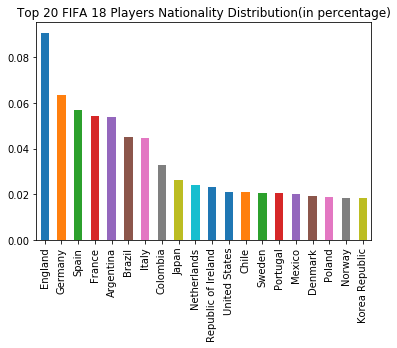

In [11]:
# 1. Which Country has the maximum number of Soccer Players collected in FIFA 18 and List the top 20 countries?
nationality_vals = CompleteDataset.Nationality.value_counts()
print(nationality_vals.head(20))

(nationality_vals.head(20)/CompleteDataset.shape[0]).plot(kind="bar");
plt.title("Top 20 FIFA 18 Players Nationality Distribution(in percentage)");

From the above result and plot; England, Germany, Spain, and France are the top 4 countries that have a maximum number of players in FIFA 18. 
It’s sensible to see the results considering Barclays Premier League, La Liga, Bundesliga were among the 5 Football Leagues in Europe. 
These leagues signify the finest football in Europe drawing maximum football stars and a lot attention, fuel soccer growth and fascination with the sports. The fifth and sixth ranking is Argentina and Brazil. My favorite players belong to Argentina and Brazil.

25    1522
23    1394
24    1334
22    1324
21    1286
20    1245
26    1202
27    1152
29    1121
19    1069
28    1051
30     804
18     672
31     671
33     617
32     506
34     272
17     258
35     191
36     136
Name: Age, dtype: int64


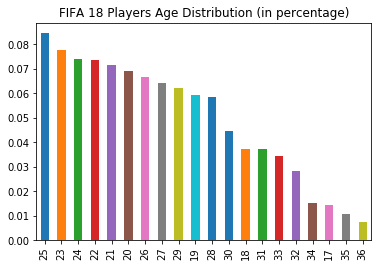

In [12]:
# 2. What is the age distribution of the FIFA 18 Players?
age_vals = CompleteDataset.Age.value_counts()
print(age_vals.head(20))

(age_vals.head(20)/CompleteDataset.shape[0]).plot(kind="bar");
plt.title("FIFA 18 Players Age Distribution (in percentage)");

It’s evident that the maximum number of players is at 25 years of age. Players older than thirty years of age are declining and it makes sense that this particular sport require more fitness versus other sports. Thus the number for players elder than 30 drops with the growth of age.

In [14]:
# 3. Identify the top clubs with the highest total player market value, and the highest average player wage?
Value_Wage_DF = CompleteDataset[["Name", "Club", "Value_Number", "Wage_Number"]]
Value_Wage_DF.head()

,Name,Club,Value_Number,Wage_Number
0,Cristiano Ronaldo,Real Madrid CF,95500000.0,565000.0
1,L. Messi,FC Barcelona,105000000.0,565000.0
2,Neymar,Paris Saint-Germain,123000000.0,280000.0
3,L. Suárez,FC Barcelona,97000000.0,510000.0
4,M. Neuer,FC Bayern Munich,61000000.0,230000.0


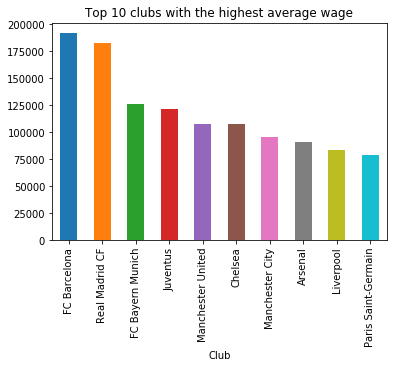

In [15]:
# Find out the top 10 clubs with the highest average wage
Value_Wage_DF.groupby("Club")["Wage_Number"].mean().sort_values(ascending=False).head(10).plot(kind="bar");
plt.title("Top 10 clubs with the highest average wage");

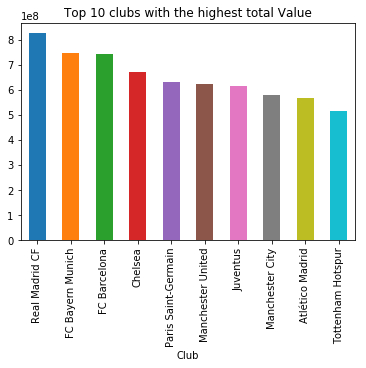

In [16]:
# Find out the top 10 clubs with the highest total player market value
Value_Wage_DF.groupby("Club")["Value_Number"].sum().sort_values(ascending=False).head(10).plot(kind="bar");
plt.title("Top 10 clubs with the highest total Value");

FC Barcelona, Real Madrid CF, and FC Bayern Munich are the highest-earning players comparing to any other clubs.

In [17]:
# 4. Identify the best squad
BestSquad_DF = CompleteDataset[['Name', 'Age', 'Overall', 'Potential', 'Preferred Position']]
BestSquad_DF.head()

,Name,Age,Overall,Potential,Preferred Position
0,Cristiano Ronaldo,32,94,94,ST
1,L. Messi,30,93,93,RW
2,Neymar,25,92,94,LW
3,L. Suárez,30,92,92,ST
4,M. Neuer,31,92,92,GK


I feel that the above analysis would be beneficial in choosing the best squad based on the player overall value.
I chose the best squad for two formations, Formation 4–3–3 and Formation 3–4–1–2
In addition, I remember for example in FIFA Ultimate Team Mode, the gamer needs to choose their team squad and try to collect the best players to win the matches. This sort of analytics could be potential gamechanger.

In [18]:
def find_best_squad(position):
    """
    This function perform selection of the player with highest Overall Value for each provided position
    
    Parameter:
    position(str): a particular position of a certain footbal formation
    
    Returns:
    Position: The position from Input Parameter
    Player:   The Best Player Name for this Position
    Overall:  The Overall Value for this Best Player
    """
    BestSquad_DF_copy = BestSquad_DF.copy()
    BestSquad = []
    for i in position:
        BestSquad.append([i,BestSquad_DF_copy.loc[[BestSquad_DF_copy[BestSquad_DF_copy['Preferred Position'] == i]['Overall'].idxmax()]]['Name'].to_string(index = False), BestSquad_DF_copy[BestSquad_DF_copy['Preferred Position'] == i]['Overall'].max()])
        BestSquad_DF_copy.drop(BestSquad_DF_copy[BestSquad_DF_copy['Preferred Position'] == i]['Overall'].idxmax(), inplace = True)

    return pd.DataFrame(np.array(BestSquad).reshape(11,3), columns = ['Position', 'Player', 'Overall']).to_string(index = False)

In [19]:
# Formation 433
squad_Formation433 = ['GK', 'LB', 'CB', 'CB', 'RB', 'LM', 'CDM', 'RM', 'LW', 'ST', 'RW']
print ('Best Squad of Formation 4-3-3')
print (find_best_squad(squad_Formation433))

Best Squad of Formation 4-3-3
Position             Player Overall
     GK           M. Neuer      92
     LB            Marcelo      87
     CB       Sergio Ramos      90
     CB       G. Chiellini      89
     RB           Carvajal      84
     LM         C. Eriksen      87
    CDM           T. Kroos      90
     RM       K. De Bruyne      89
     LW             Neymar      92
     ST  Cristiano Ronaldo      94
     RW           L. Messi      93


In [20]:
# Formation 3412
squad_Formation3412 = ['GK', 'CB', 'CB', 'CB', 'LM', 'CM', 'CM', 'RM', 'CAM', 'ST', 'ST']
print ('Best Squad of Formation 3-4-1-2')
print (find_best_squad(squad_Formation3412))

Best Squad of Formation 3-4-1-2
Position             Player Overall
     GK           M. Neuer      92
     CB       Sergio Ramos      90
     CB       G. Chiellini      89
     CB         L. Bonucci      88
     LM         C. Eriksen      87
     CM           N. Kanté      87
     CM           A. Vidal      87
     RM       K. De Bruyne      89
    CAM           Coutinho      86
     ST  Cristiano Ronaldo      94
     ST          L. Suárez      92


In [21]:
# 5. Do Correlation between Age, Overall, Potential, Position, Club, Nationality, Special vs Value/Wage
Correlation_DF = CompleteDataset[['Name', 'Age', 'Overall', 'Potential', 'Preferred_Position_onehot_encode', 'Club_onehot_encode', 'Nationality_onehot_encode', 'Special', 'Value_Number', 'Wage_Number']]

Correlation_DF.corr()

,Age,Overall,Potential,Preferred_Position_onehot_encode,Club_onehot_encode,Nationality_onehot_encode,Special,Value_Number,Wage_Number
Age,1.000000,0.459765,-0.218264,-0.052814,-0.005144,-0.029833,0.238667,0.079309,0.150006
Overall,0.459765,1.000000,0.683474,-0.021502,0.014416,-0.039084,0.604092,0.626001,0.593789
Potential,-0.218264,0.683474,1.000000,-0.007843,0.020327,-0.030274,0.399511,0.588074,0.519062
Preferred_Position_onehot_encode,-0.052814,-0.021502,-0.007843,1.000000,0.001157,-0.002518,0.071101,0.018435,0.021745
Club_onehot_encode,-0.005144,0.014416,0.020327,0.001157,1.000000,0.004485,0.008653,0.004005,-0.009684
Nationality_onehot_encode,-0.029833,-0.039084,-0.030274,-0.002518,0.004485,1.000000,-0.020016,-0.016290,-0.012253
Special,0.238667,0.604092,0.399511,0.071101,0.008653,-0.020016,1.000000,0.376629,0.367419
Value_Number,0.079309,0.626001,0.588074,0.018435,0.004005,-0.016290,0.376629,1.000000,0.850510
Wage_Number,0.150006,0.593789,0.519062,0.021745,-0.009684,-0.012253,0.367419,0.850510,1.000000


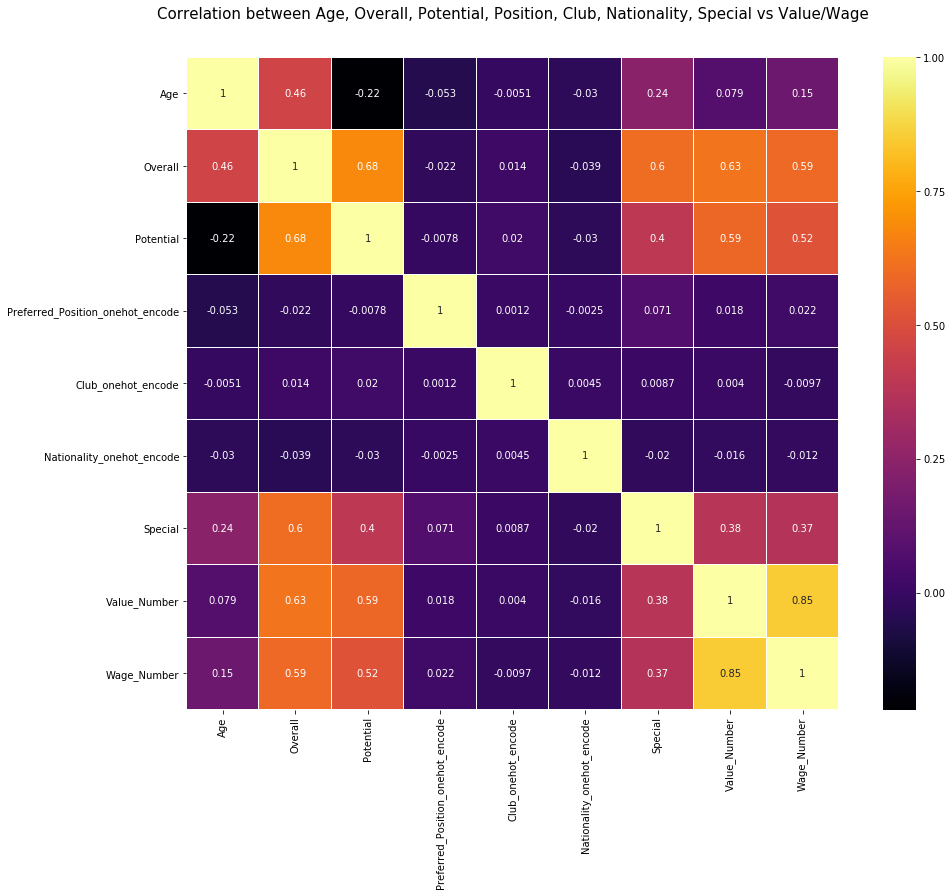

In [22]:
colormap = plt.cm.inferno
plt.figure(figsize=(16,12))
plt.title('Correlation between Age, Overall, Potential, Position, Club, Nationality, Special vs Value/Wage', y=1.05, size=15)
sns.heatmap(Correlation_DF.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

As per the above heatmap, Overall and Potential are positively related to Wage & Value. Special have positive correlation as well with Wage & Value.
On the other side Club, Nationality and Position are not so important characteristic features that co-relate with Wage & Value. 
Besides that, additionally found that Wage and Value are highly correlated to each other which is quite rational.